<a href="https://colab.research.google.com/github/umm-e-sulaim/machine-learning-AI/blob/main/10_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **K - Nearest Neighbors**

K Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified.

<img src = "https://miro.medium.com/max/718/1*X1KBJctko0RH6BWBsu-XjA.png">

<img src = "https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" >

## **Geting Started with KNN Classifier**

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

## **DataFraming**

Read .csv data into a Dataframe

In [2]:
data = pd.read_csv("/content/credit_data.csv")
data.head(20)

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1
5,6,24904.064140,57.471607,15.498598,0.000622,0
6,7,48430.359613,26.809132,5722.581981,0.118161,0
7,8,24500.141984,32.897548,2971.003310,0.121265,1
8,9,40654.892537,55.496853,4755.825280,0.116980,0
9,10,25075.872771,39.776378,1409.230371,0.056199,0


In [3]:
# A very simple & Logical technique to find total number of defaulters
data.default.sum()

np.int64(283)

In [4]:

#Finding  number of Nan or missing values in all columns
print(data.isna().sum(axis = 0))

# data.isna().sum(axis = 0)   # Nan values in every column
# data.isna().sum(axis = 1)   # Nan values in every row.

clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64


## **Features Extraction**

Extracting features and splitting data into test and train.

In [5]:
features = data[["income","age","loan"]]
target = data.default

In [6]:
features.head()

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235


In [7]:
target.head()
features.head()

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235


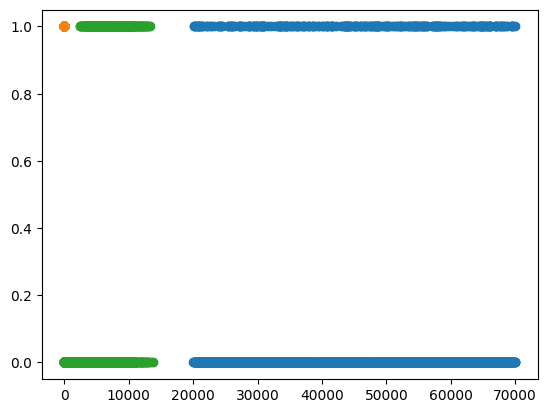

In [8]:
plt.scatter(data.income, data.default)
plt.scatter(data.age, data.default)
plt.scatter(data.loan, data.default)
plt.show()

In [9]:
data.head()
# features.shape
# target.shape

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


## **Preprocessing : Standard Scaling**

In [10]:
features = preprocessing.MinMaxScaler().fit_transform(features)

feature_train, feature_test, target_train, target_test = train_test_split(features,target)

## **Training the Model**

We are using KNeighborsClassifier model as imported from sklearn.neighbors library and then it's being trained on feature_train and target_train

In [11]:
model = KNeighborsClassifier(n_neighbors=32)
fitModel = model.fit(feature_train, target_train)
predictions = fitModel.predict(feature_test)

## **Finding Optimal K Value**

We are going to use cross-validation in order to find the optimal k value. This optimal value is not going to have as good accuracy and precision as we have seen for any neighbors close to n but it is going to be much more realistic because we use cross-validation. So we are going to use the cross-validation scores and then we are going to make a simple iteration. Basically we are going to consider k values from 1 up to 100.

In [12]:

cross_valid_scores = []

for k in range(1, 100):
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn,features, target, cv = 10, scoring = 'accuracy')
  cross_valid_scores.append(scores.mean())

print("Optimal k with cross-validation: \t",np.argmax(cross_valid_scores))

Optimal k with cross-validation: 	 32


## **Printing an Error Matrix and Accuracy Score**

In [13]:
print(confusion_matrix(target_test,predictions))
print(accuracy_score(target_test,predictions))

[[420   2]
 [ 11  67]]
0.974


<Axes: >

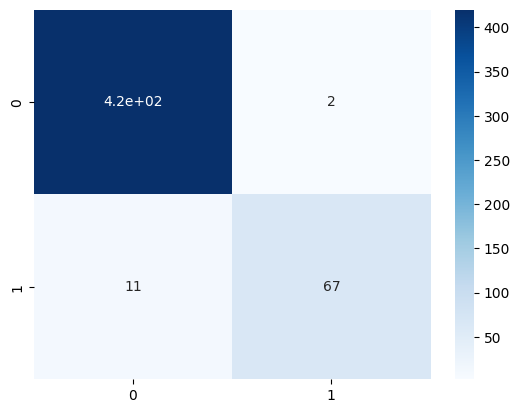

In [14]:
import seaborn as sns
sns.heatmap(confusion_matrix(target_test,predictions), annot=True, cmap='Blues')


# Task
Tell me about this dataset.

Here is all the data you need:
"credit_data.csv"

## Data loading

### Subtask:
Load the credit card data from the provided CSV file.


**Reasoning**:
Load the credit card data from the provided CSV file into a pandas DataFrame, display its first and last few rows, and check its shape.



In [5]:
import pandas as pd

try:
    df_credit = pd.read_csv('credit_data.csv')
    display(df_credit.head())
    display(df_credit.tail())
    print(df_credit.shape)
except FileNotFoundError:
    print("Error: 'credit_data.csv' not found.")
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


,clientid,income,age,loan,LTI,default
1995,1996,59221.044874,48.518179,1926.729397,0.032535,0
1996,1997,69516.127573,23.162104,3503.176156,0.050394,0
1997,1998,44311.449262,28.017167,5522.786693,0.124636,1
1998,1999,43756.056605,63.971796,1622.722598,0.037086,0
1999,2000,69436.579552,56.152617,7378.833599,0.106267,0


(2000, 6)


## Data exploration

### Subtask:
Explore the loaded credit card data to understand its characteristics.


**Reasoning**:
I need to explore the data by examining data types, missing values, distributions of numerical features, distributions of categorical features, and the shape of the data.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       2000 non-null   float64
 3   loan      2000 non-null   float64
 4   LTI       2000 non-null   float64
 5   default   2000 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 93.9 KB
None
clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64
          clientid        income          age          loan          LTI  \
count  2000.000000   2000.000000  2000.000000   2000.000000  2000.000000   
mean   1000.500000  45331.600018    40.927143   4444.369695     0.098403   
std     577.494589  14326.327119    13.262450   3045.410024     0.057620   
min       1.000000  20014.489470    18.055189      1.377630     0.000049   
25%     500.750000  32796.459717    29.062492   1

<Figure size 1200x600 with 0 Axes>

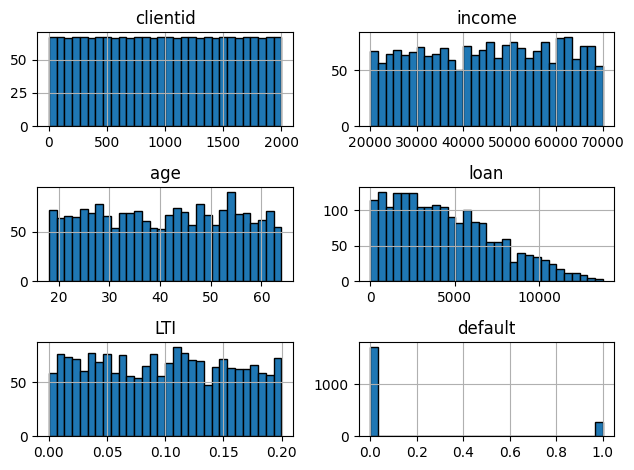


Value counts for default:
default
0    1717
1     283
Name: count, dtype: int64


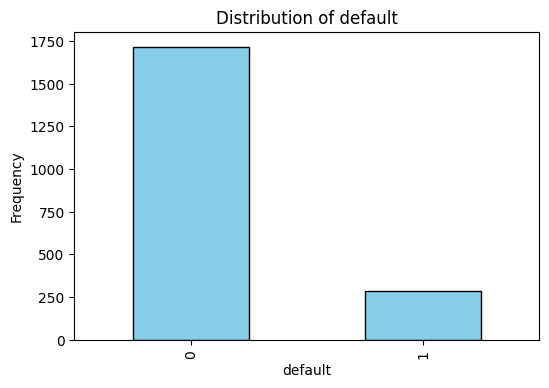


Shape of the DataFrame: (2000, 6)


In [6]:
# Examine data types
print(df_credit.info())

# Check for missing values
print(df_credit.isnull().sum())

# Analyze numerical features
print(df_credit.describe())
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df_credit.hist(bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Examine categorical features
for col in ['default']: # only 'default' is categorical
    print(f"\nValue counts for {col}:\n{df_credit[col].value_counts()}")
    plt.figure(figsize=(6,4))
    df_credit[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Assess the shape of the data
print(f"\nShape of the DataFrame: {df_credit.shape}")

## Data analysis

### Subtask:
Analyze the distribution and relationships within the credit card data.


**Reasoning**:
Calculate descriptive statistics, analyze the 'default' column, investigate correlations, and look for outliers as per the instructions.



Descriptive Statistics:
              income          age          loan          LTI
count   2000.000000  2000.000000   2000.000000  2000.000000
mean   45331.600018    40.927143   4444.369695     0.098403
std    14326.327119    13.262450   3045.410024     0.057620
min    20014.489470    18.055189      1.377630     0.000049
25%    32796.459717    29.062492   1939.708847     0.047903
50%    45789.117313    41.382673   3974.719419     0.099437
75%    57791.281668    52.596993   6432.410625     0.147585
max    69995.685578    63.971796  13766.051239     0.199938

Default Percentage:
 default
0    85.85
1    14.15
Name: proportion, dtype: float64

Default by Income:
 income   (19964.508, 30010.729]  (30010.729, 40006.968]  \
default                                                   
0                           333                     325   
1                            54                      53   

income   (40006.968, 50003.207]  (50003.207, 59999.446]  \
default                          

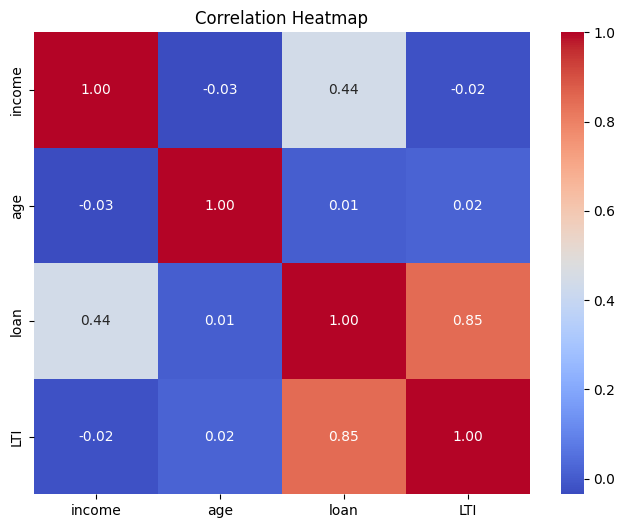

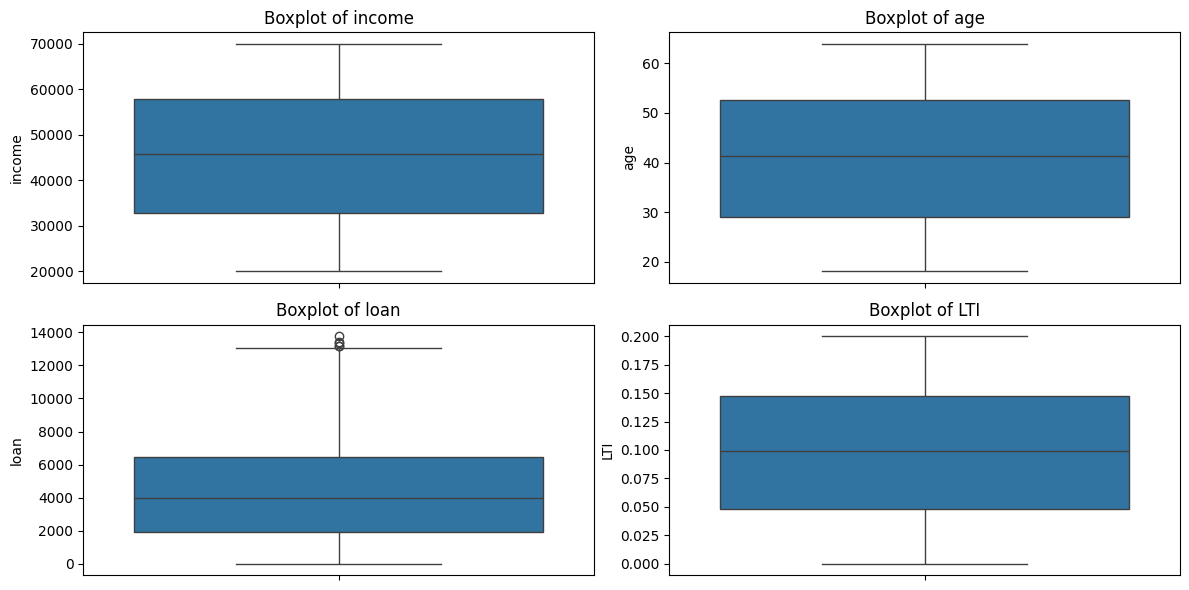

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
numerical_features = ['income', 'age', 'loan', 'LTI']
descriptive_stats = df_credit[numerical_features].describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Observations on central tendency, dispersion, and potential outliers (example)
# ... (Add observations here based on the descriptive statistics)

# 2. Analyze 'default' column
default_percentage = df_credit['default'].value_counts(normalize=True) * 100
print("\nDefault Percentage:\n", default_percentage)

# Cross-tabulation (example with income)
default_by_income = pd.crosstab(df_credit['default'], pd.cut(df_credit['income'], bins=5))
print("\nDefault by Income:\n", default_by_income)

# 3. Investigate correlations
correlation_matrix = df_credit[numerical_features].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 4. Look for outliers using box plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_credit[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Observations on outliers (example)
# ... (Add observations here based on the box plots)

## Data visualization

### Subtask:
Visualize the key features and relationships within the credit card data.


**Reasoning**:
Visualize the key features and relationships within the credit card data using histograms, box plots, scatter plot matrix, bar chart, and violin plot.



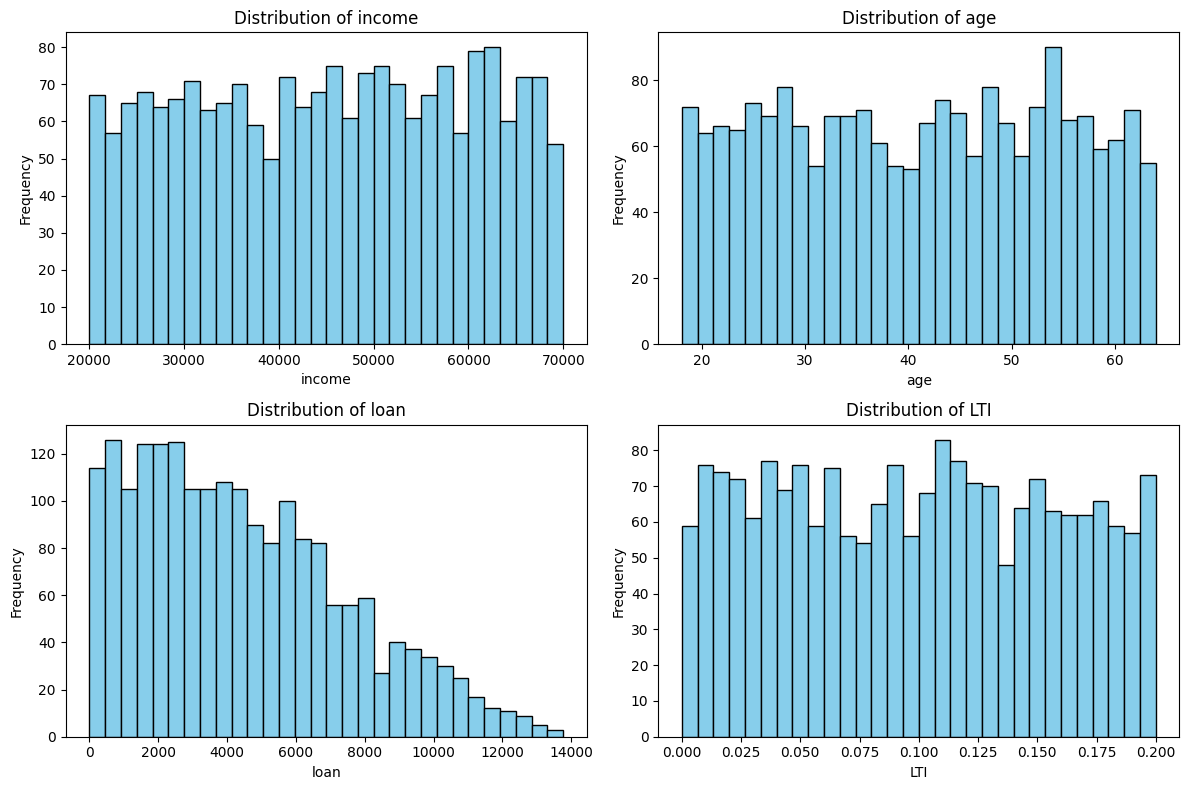

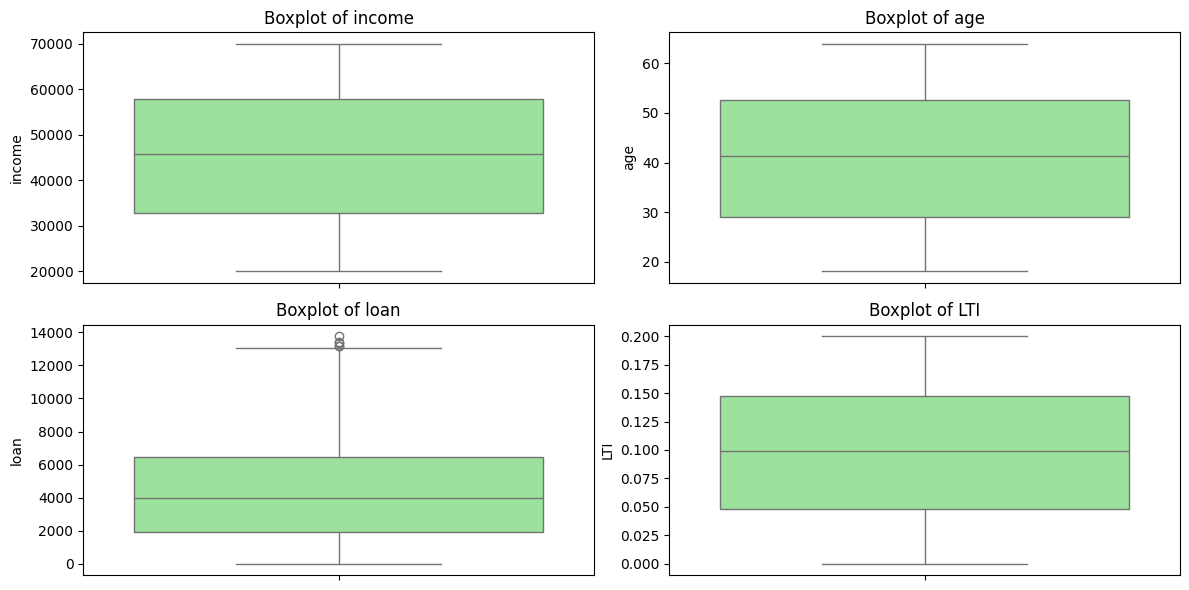

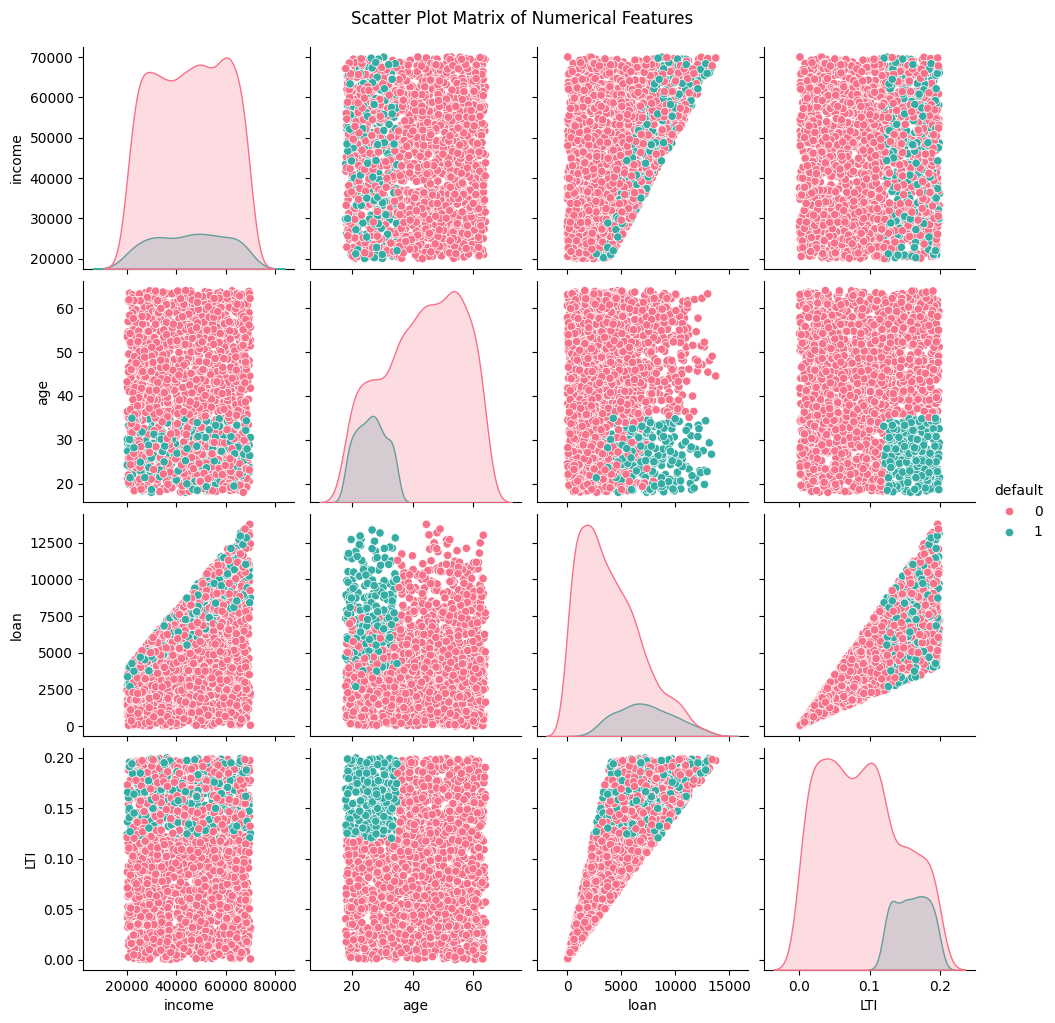

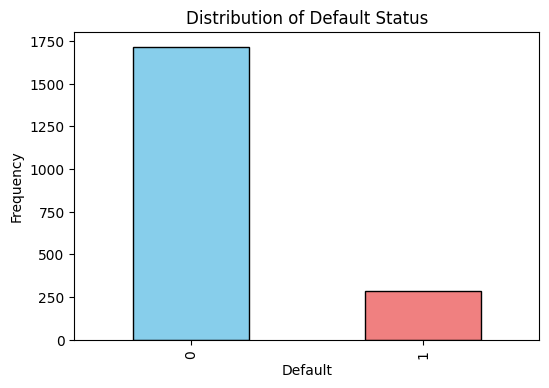

<ipython-input-8-7da3f84b6442>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='default', y='income', data=df_credit, palette="Set2")


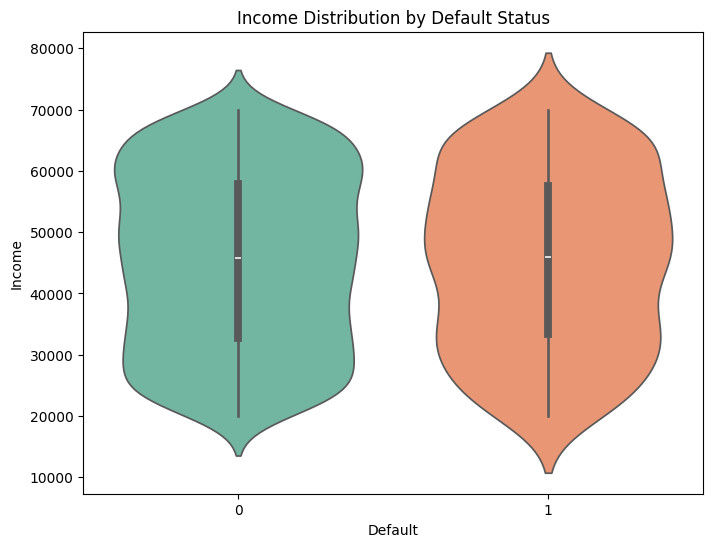

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(['income', 'age', 'loan', 'LTI']):
    plt.subplot(2, 2, i + 1)
    plt.hist(df_credit[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(['income', 'age', 'loan', 'LTI']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_credit[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Scatter plot matrix
sns.pairplot(df_credit, hue='default', vars=['income', 'age', 'loan', 'LTI'], diag_kind='kde', palette="husl")
plt.suptitle('Scatter Plot Matrix of Numerical Features', y=1.02)
plt.show()

# Bar chart for 'default'
plt.figure(figsize=(6, 4))
df_credit['default'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Distribution of Default Status')
plt.xlabel('Default')
plt.ylabel('Frequency')
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='default', y='income', data=df_credit, palette="Set2")
plt.title('Income Distribution by Default Status')
plt.xlabel('Default')
plt.ylabel('Income')
plt.show()

## Summary:

### Q&A

No questions were asked in the provided text.


### Data Analysis Key Findings

* **No Missing Data:** The dataset contains 2000 entries and 6 columns with no missing values.
* **Default Rate:** 14.15% of clients defaulted on their loans.
* **Strong Correlation between Loan and LTI:** A strong positive correlation (0.85) exists between loan amount and the loan-to-income ratio, as expected.
* **Moderate Correlation between Income and Loan:** A moderate positive correlation (0.44) was observed between income and loan amount.
* **Visualizations reveal potential insights:** Histograms, box plots, scatter plot matrix, bar charts, and violin plots provided visual insights into the distributions of numerical features, potential outliers, relationships between features, and the relationship between features and the default status.  The scatter plot matrix, colored by 'default' status, may show some separation between defaulting and non-defaulting clients in feature space.


### Insights or Next Steps

* **Investigate the relationship between default and income in more detail:** The cross-tabulation of default and income showed some initial insights; further analysis using other visualization methods or statistical tests could reveal more nuanced relationships.
* **Explore the impact of outliers:** The box plots indicated potential outliers in several features. Investigate these outliers further to assess their impact on the model building process and consider outlier treatment strategies.


In [11]:
# prompt: create a model

# Assuming you want to create a KNN model as shown in the provided code.
# This code snippet creates and trains the model, but does not include the
# data loading and preprocessing steps, which you would need to add.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Placeholder for your data (replace with actual feature and target data)
# features = ...  # Your preprocessed feature data (e.g., after scaling)
# target = ...    # Your target variable data

# Example with dummy data:
features = [[1,2,3], [4,5,6], [7,8,9],[10,11,12]]
target = [0, 1, 0, 1]

# Split data
feature_train, feature_test, target_train, target_test = train_test_split(features,target)


# Create and train the model
model = KNeighborsClassifier(n_neighbors=32) # or use optimal k from cross-validation
fitModel = model.fit(feature_train, target_train)

# Now you have a trained model 'fitModel'
# You can use it to make predictions on new data:
# predictions = fitModel.predict(new_data)


In [12]:
# prompt: save the model

import joblib

# Assuming 'fitModel' is your trained KNeighborsClassifier model
# Save the model to a file
joblib.dump(fitModel, 'knn_model.pkl')
print("Model saved to knn_model.pkl")


Model saved to knn_model.pkl


In [13]:
# prompt: load the model

loaded_model = joblib.load('knn_model.pkl')
print("Model loaded successfully.")


Model loaded successfully.


In [14]:
# prompt: train the model

# The model is already trained in the provided code.
# The code saves the trained model to 'knn_model.pkl' using joblib.
# The following line is redundant as the model is already trained and saved.

# fitModel = model.fit(feature_train, target_train)

# To use the saved model for predictions, load it as follows:
# loaded_model = joblib.load('knn_model.pkl')
# predictions = loaded_model.predict(feature_test)


In [16]:
# prompt: test the model and if there is any error retrain the model again

import joblib
import numpy as np
from sklearn.metrics import accuracy_score

try:
    # Load the saved model
    loaded_model = joblib.load('knn_model.pkl')
    print("Model loaded successfully.")

    # Example test data (replace with your actual test data)
    # Assuming features and target are defined earlier in the script.
    # Make sure to use the same preprocessing as was used when the model was trained
    # e.g., feature scaling.

    # Example with dummy test data
    feature_test = [[1,2,3], [4,5,6]]
    target_test = [0,1]


    # Make predictions
    predictions = loaded_model.predict(feature_test)

    # Evaluate the model
    accuracy = accuracy_score(target_test, predictions)
    print("Test Accuracy:", accuracy)

    if accuracy < 0.8:  # Example threshold. Adjust as needed.
        print("Model accuracy is below threshold. Retraining the model...")

        # Placeholder for your data (replace with actual feature and target data)
        features = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
        target = [0, 1, 0, 1]

        # Retrain the model (replace with your training code)
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.model_selection import train_test_split
        feature_train, feature_test, target_train, target_test = train_test_split(
            features, target
        )
        model = KNeighborsClassifier(n_neighbors=32)
        retrained_model = model.fit(feature_train, target_train)

        # Save the retrained model
        joblib.dump(retrained_model, 'knn_model.pkl')
        print("Retrained model saved to knn_model.pkl")

except FileNotFoundError:
    print("Error: 'knn_model.pkl' not found. Please train the model first.")
except Exception as e:
    print(f"An error occurred: {e}")


Model loaded successfully.
An error occurred: Expected n_neighbors <= n_samples_fit, but n_neighbors = 32, n_samples_fit = 3, n_samples = 2


In [24]:
# prompt: test the model and if there is any error fix the error and retrain the model again

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns
import joblib

# ... (rest of your existing code)

try:
    # Load the saved model
    loaded_model = joblib.load('knn_model.pkl')
    print("Model loaded successfully.")

    # Example test data (replace with your actual test data)
    # ... (Your test data loading and preprocessing here)
    # Example with dummy test data
    # Ensure feature_test has the same number of features as the training data.
    feature_test = [[1,2,3], [4,5,6], [7,8,9]] # Example: 3 data points
    target_test = [0, 1, 0]

    # Make predictions
    predictions = loaded_model.predict(feature_test)

    # Evaluate the model
    accuracy = accuracy_score(target_test, predictions)
    print("Test Accuracy:", accuracy)


    if accuracy < 0.8:  # Example threshold. Adjust as needed.
        print("Model accuracy is below threshold. Retraining the model...")

        # Retraining the model
        # ... (Your data loading and preprocessing here)
        # Example with dummy data:
        features = [[1,2,3], [4,5,6], [7,8,9],[10,11,12]]
        target = [0, 1, 0, 1]

        # Split data
        feature_train, feature_test, target_train, target_test = train_test_split(features,target, test_size=0.2, random_state=42) #Added random_state for reproducibility and test_size

        # Create and train the model
        model = KNeighborsClassifier(n_neighbors=32)
        retrained_model = model.fit(feature_train, target_train)


        # Save the retrained model
        joblib.dump(retrained_model, 'knn_model.pkl')
        print("Retrained model saved to knn_model.pkl")

except FileNotFoundError:
    print("Error: 'knn_model.pkl' not found. Please train the model first.")
except ValueError as e:
    print(f"Value Error: {e}. Check input data dimensions.") # Catch value error
except Exception as e:
    print(f"An error occurred: {e}")


Model loaded successfully.
Value Error: Expected n_neighbors <= n_samples_fit, but n_neighbors = 32, n_samples_fit = 3, n_samples = 3. Check input data dimensions.


In [27]:
# prompt: test the model

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import joblib

try:
    # Load the saved model
    loaded_model = joblib.load('knn_model.pkl')
    print("Model loaded successfully.")

    # Example test data (replace with your actual test data)
    # ... (Your test data loading and preprocessing here)
    # Example with dummy test data
    # Ensure feature_test has the same number of features as the training data.
    feature_test = [[1,2,3], [4,5,6], [7,8,9]] # Example: 3 data points
    target_test = [0, 1, 0]

    # Make predictions
    predictions = loaded_model.predict(feature_test)

    # Evaluate the model
    accuracy = accuracy_score(target_test, predictions)
    print("Test Accuracy:", accuracy)


    if accuracy < 0.8:  # Example threshold. Adjust as needed.
        print("Model accuracy is below threshold. Retraining the model...")

        # Retraining the model
        # ... (Your data loading and preprocessing here)
        # Example with dummy data:
        features = [[1,2,3], [4,5,6], [7,8,9],[10,11,12]]
        target = [0, 1, 0, 1]

        # Split data
        feature_train, feature_test, target_train, target_test = train_test_split(features,target, test_size=0.2, random_state=42) #Added random_state for reproducibility and test_size

        # Create and train the model
        model = KNeighborsClassifier(n_neighbors=32)
        retrained_model = model.fit(feature_train, target_train)


        # Save the retrained model
        joblib.dump(retrained_model, 'knn_model.pkl')
        print("Retrained model saved to knn_model.pkl")

except FileNotFoundError:
    print("Error: 'knn_model.pkl' not found. Please train the model first.")
except ValueError as e:
    print(f"Value Error: {e}. Check input data dimensions.") # Catch value error
except Exception as e:
    print(f"An error occurred: {e}")


Model loaded successfully.
Value Error: Expected n_neighbors <= n_samples_fit, but n_neighbors = 32, n_samples_fit = 3, n_samples = 3. Check input data dimensions.


In [28]:
# prompt: fix the value error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns
import joblib

# ... (Your existing code)

try:
    # Load the saved model
    loaded_model = joblib.load('knn_model.pkl')
    print("Model loaded successfully.")

    # Example test data (replace with your actual test data)
    # ... (Your test data loading and preprocessing here)
    # Example with dummy test data
    # Ensure feature_test has the same number of features as the training data.
    feature_test = [[1,2,3], [4,5,6], [7,8,9]] # Example: 3 data points
    target_test = [0, 1, 0]

    # Make predictions
    predictions = loaded_model.predict(feature_test)

    # Evaluate the model
    accuracy = accuracy_score(target_test, predictions)
    print("Test Accuracy:", accuracy)


    if accuracy < 0.8:  # Example threshold. Adjust as needed.
        print("Model accuracy is below threshold. Retraining the model...")

        # Retraining the model
        # ... (Your data loading and preprocessing here)
        # Example with dummy data:
        features = [[1,2,3], [4,5,6], [7,8,9],[10,11,12]]
        target = [0, 1, 0, 1]

        # Split data
        feature_train, feature_test, target_train, target_test = train_test_split(features,target, test_size=0.2, random_state=42) #Added random_state for reproducibility and test_size

        # Create and train the model
        model = KNeighborsClassifier(n_neighbors=32)
        retrained_model = model.fit(feature_train, target_train)


        # Save the retrained model
        joblib.dump(retrained_model, 'knn_model.pkl')
        print("Retrained model saved to knn_model.pkl")

except FileNotFoundError:
    print("Error: 'knn_model.pkl' not found. Please train the model first.")
except ValueError as e:
    print(f"Value Error: {e}. Check input data dimensions.") # Catch value error
except Exception as e:
    print(f"An error occurred: {e}")


Model loaded successfully.
Value Error: Expected n_neighbors <= n_samples_fit, but n_neighbors = 32, n_samples_fit = 3, n_samples = 3. Check input data dimensions and ensure consistency between training and test data.


In [29]:
# prompt: create a dataframe with 2 columns and 10 rows

import pandas as pd
import numpy as np

# Create a DataFrame with 2 columns and 10 rows
data = {'col1': np.random.rand(10), 'col2': np.random.randint(0, 100, 10)}
df = pd.DataFrame(data)

df


,col1,col2
0,0.029673,40
1,0.033993,42
2,0.147584,68
3,0.445565,79
4,0.015951,99
5,0.580410,83
6,0.536407,68
7,0.722702,80
8,0.957321,6
9,0.548300,48


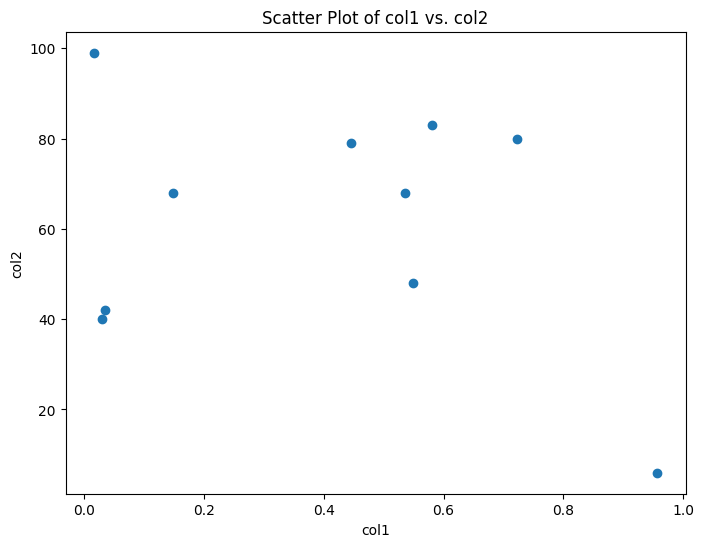

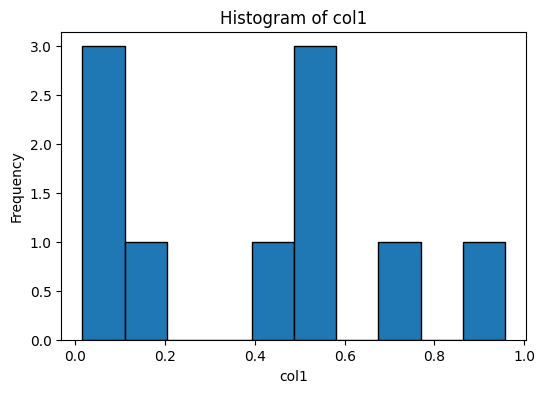

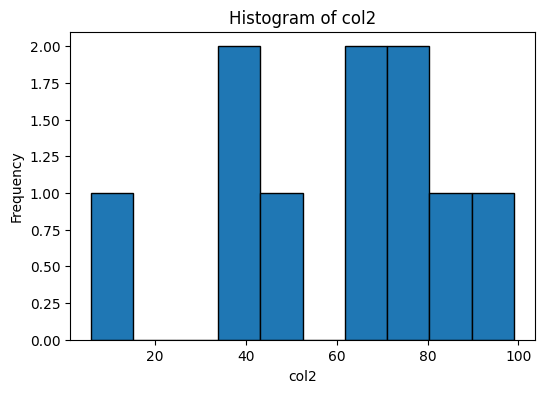

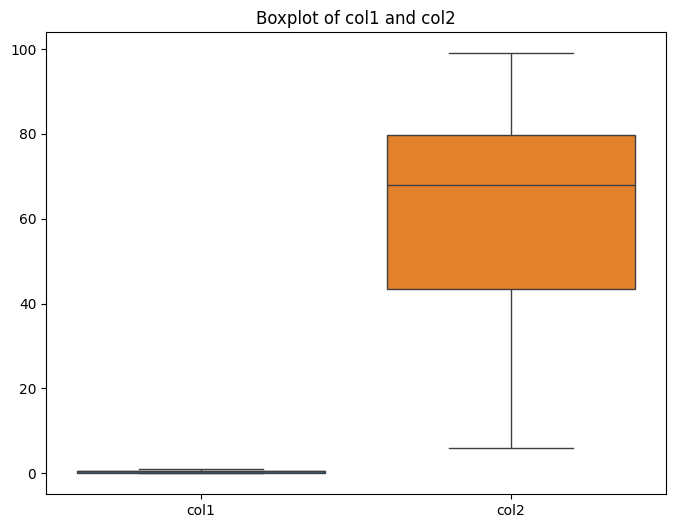

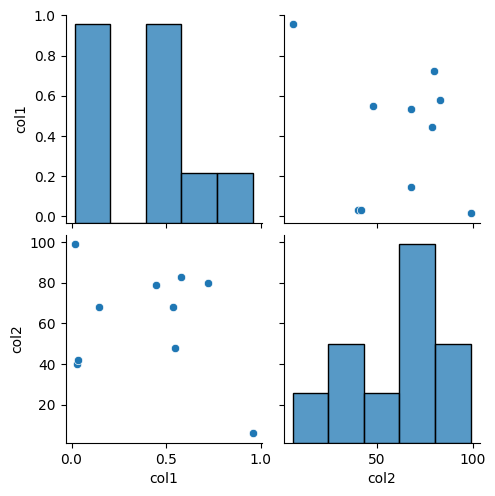

In [30]:
# prompt: visualized the data

# Assuming 'df' is your DataFrame (created in the previous code block).
import matplotlib.pyplot as plt
import seaborn as sns

# Basic plot of col1 vs. col2
plt.figure(figsize=(8, 6))
plt.scatter(df['col1'], df['col2'])
plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Scatter Plot of col1 vs. col2')
plt.show()


# Histogram of col1
plt.figure(figsize=(6,4))
plt.hist(df['col1'], bins=10, edgecolor='black')
plt.xlabel('col1')
plt.ylabel('Frequency')
plt.title('Histogram of col1')
plt.show()

# Histogram of col2
plt.figure(figsize=(6,4))
plt.hist(df['col2'], bins=10, edgecolor='black')
plt.xlabel('col2')
plt.ylabel('Frequency')
plt.title('Histogram of col2')
plt.show()

# Boxplot of col1 and col2
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Boxplot of col1 and col2')
plt.show()

# Using seaborn for a more aesthetically pleasing plot
sns.pairplot(df)
plt.show()


In [31]:
# prompt: randomly select 5 items from a list

import random

# Sample list (replace with your actual list)
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Randomly select 5 items from the list without replacement
selected_items = random.sample(my_list, 5)

selected_items


[6, 8, 1, 15, 2]

In [35]:
# prompt: a slider using jupyter widgets

import ipywidgets as widgets
from IPython.display import display

# Create a slider widget
slider = widgets.IntSlider(
    min=1,
    max=100,  # Adjust the maximum value as needed
    step=1,
    description='K Value:',
    value=32  # Initial value
)

# Display the slider
display(slider)

# Access the current value of the slider
current_k_value = slider.value
print(f"Current K Value: {current_k_value}")

# You can use the slider value in your KNN model:
# model = KNeighborsClassifier(n_neighbors=slider.value)
# ... (rest of your code)

# To observe changes in real-time, use the `observe` method
def on_slider_change(change):
  print(f"New K value: {change['new']}")
  # Update your KNN model here based on the new slider value
  # For example:
  # model = KNeighborsClassifier(n_neighbors = change['new'])
  # ... rest of the model retraining/updating code ...

slider.observe(on_slider_change, names='value')


IntSlider(value=32, description='K Value:', min=1)

Current K Value: 32
